# YOLOv8 Object Detection on Self-Driving-Car Data

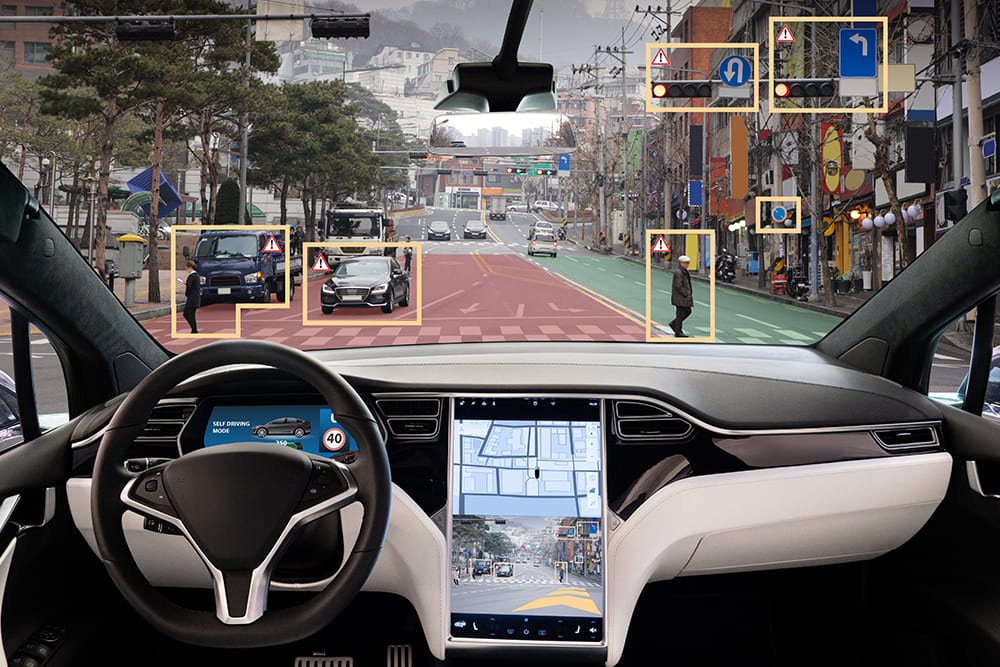

## What is YOLO?
You Only Look Once (YOLO) is a cutting-edge object detection method that significantly speeds up and simplifies the process of identifying objects in images and videos. Unlike traditional approaches, YOLO treats object detection as a single step, predicting object positions and categories directly. By doing so, it achieves real-time detection without sacrificing accuracy. YOLO's neural network architecture processes images swiftly, making it valuable for applications like self-driving cars, surveillance, and robotics. YOLO's unique approach has revolutionized object detection by making it faster and more accessible while maintaining high performance.

# Importing libraries:

In [1]:
import numpy as np
import PIL 
from PIL import Image
from IPython.display import display
import matplotlib.pyplot as plt
from glob import glob
import random
import cv2
import warnings
warnings.simplefilter('ignore')

In [2]:
!pip install ultralytics 

     -------------------------------------- 663.2/663.2 kB 1.5 MB/s eta 0:00:00


YOLOv8 is a group of neural network models. These models were created and trained using PyTorch and exported to files with the .pt extension. In this project we use the yolov8m.pt which is a middle-sized model for object detection. All YOLOv8 models for object detection ship already pre-trained on the COCO dataset, which is a huge collection of images of 80 different types.

In [3]:
import ultralytics
from ultralytics import YOLO
yolo_model = YOLO('yolov8m.pt')

100%|█████████████████████████████████████████████████████████████████████████████| 49.7M/49.7M [00:23<00:00, 2.17MB/s]


In this section we have loaded the self-driving-cars image dataset which is used for training and testing autonomous vehicle systems and is crucial for developing and evaluating the performance of self-driving algorithms and models. Then we have randomly selected some images to implement yolov8 model on them as samples.

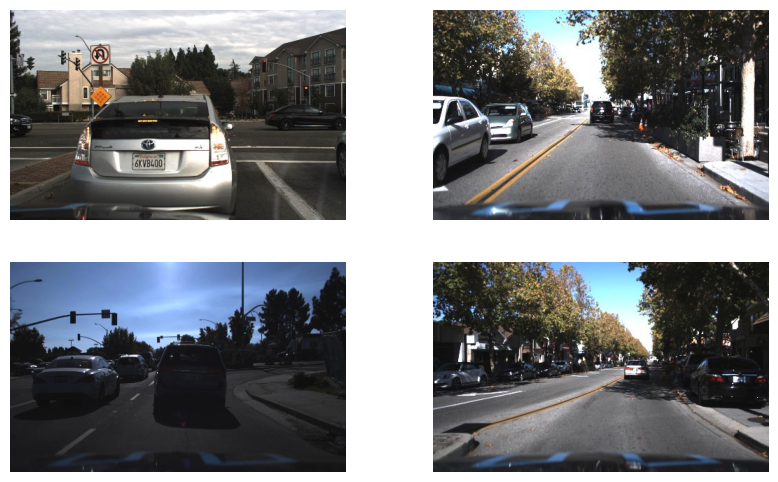

In [11]:
import cv2
import glob
import random
import matplotlib.pyplot as plt

root_path = 'C:/Users/master/OneDrive/Desktop/self driving car dataset/YOLOv8 Object Detection on Self-Driving-Car Data/images/*.jpg'
num_samples = 4
images_data = glob.glob(root_path)
random_image = random.sample(images_data, num_samples)

plt.figure(figsize=(10, 6))
for i in range(num_samples):
    plt.subplot(2, 2, i+1)
    img = cv2.imread(random_image[i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for displaying with Matplotlib
    plt.imshow(img)
    plt.axis('off')

plt.show()

In this section, we have extracted significant results from the pre-trained YOLOv8 model, including the 'name of the detected object,' 'bounding box coordinates', and 'detection probabilities'. The results for the samples have been calculated separately.

In [8]:
# Create a list to store the images
images = []
for i in range(num_samples):
    yolo_outputs = yolo_model.predict(random_image[i])
    output = yolo_outputs[0]
    box = output.boxes
    names = output.names
    
    for j in range(len(box)):
        labels = names[box.cls[j].item()]
        coordinates = box.xyxy[j].tolist()
        confidence = np.round(box.conf[j].item(), 2)
        #print(f'In this image {len(box)} objects has been detected.')
        print(f'Object {j + 1} is: {labels}')
        print(f'Coordinates are: {coordinates}')
        print(f'Confidence is: {confidence}')
        print('-------')
        
    # Store the image in the 'images' list
    images.append(output.plot()[:, :, ::-1])


image 1/1 C:\Users\master\OneDrive\Desktop\self driving car dataset\YOLOv8 Object Detection on Self-Driving-Car Data\images\1478899275795498512.jpg: 416x640 1 person, 6 cars, 1 truck, 410.1ms
Speed: 13.3ms preprocess, 410.1ms inference, 14.0ms postprocess per image at shape (1, 3, 416, 640)
Object 1 is: car
Coordinates are: [395.86505126953125, 122.1339111328125, 479.710693359375, 243.26124572753906]
Confidence is: 0.92
-------
Object 2 is: car
Coordinates are: [122.6513900756836, 130.0962677001953, 223.5742950439453, 218.79498291015625]
Confidence is: 0.9
-------
Object 3 is: truck
Coordinates are: [325.65948486328125, 127.77436065673828, 460.68310546875, 220.7550811767578]
Confidence is: 0.71
-------
Object 4 is: car
Coordinates are: [52.902339935302734, 154.39866638183594, 72.51691436767578, 171.36846923828125]
Confidence is: 0.68
-------
Object 5 is: person
Coordinates are: [76.92195129394531, 152.8133087158203, 86.66602325439453, 171.90065002441406]
Confidence is: 0.32
-------
Ob

In the last section, the results for the samples have been presented visually..



-------------------------------------- Images after object detection with YOLOV8 --------------------------------


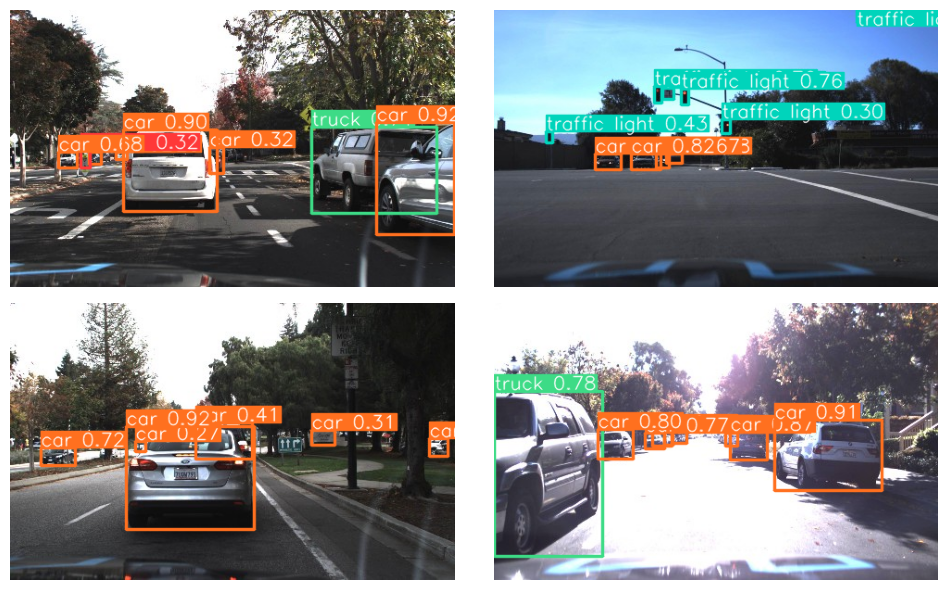

In [12]:
# plotting the images after object detection
print('\n\n-------------------------------------- Images after object detection with YOLOV8 --------------------------------')    

plt.figure(figsize=(10,6))
for i, img in enumerate(images):
    plt.subplot(2, 2, i + 1)
    plt.imshow(img)
    plt.axis('off')    
plt.tight_layout()
plt.show()